## Part-1 Implement in python SVM/Softmax classifier for CIFAR-10 dataset

## Part-2 Implement Transfer learning for CIFAR-10 dataset

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import cifar10
from sklearn.preprocessing import OneHotEncoder

In [3]:
"""import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context"""

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [7]:
cifar_10_classes = [
    "Airplane",
    "Automobile",
    "Bird",
    "Cat",
    "Deer",
    "Dog",
    "Frog",
    "Horse",
    "Ship",
    "Truck"
]

In [5]:
x_train.shape

(50000, 32, 32, 3)

(-0.5, 31.5, 31.5, -0.5)

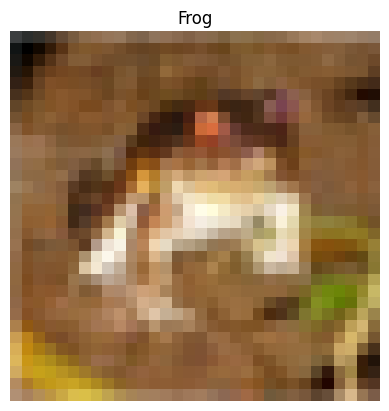

In [7]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0])
plt.title(cifar_10_classes[y_train[0][0]])
plt.axis("off")

In [8]:
X_train = x_train / 255.0
X_test = x_test / 255.0

In [9]:
one_hot_encoder = OneHotEncoder()
y_train = one_hot_encoder.fit_transform(y_train).toarray()
y_test = one_hot_encoder.transform(y_test).toarray()

In [10]:
softmax_model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
    tf.keras.layers.Dense(10, activation='softmax')
])

/Users/lucifertrj/Desktop/DeepLearningLecture/env/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
softmax_model.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

In [12]:
softmax_model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 759us/step - accuracy: 0.2794 - loss: 2.0299 - val_accuracy: 0.3238 - val_loss: 1.9500
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 528us/step - accuracy: 0.3527 - loss: 1.8654 - val_accuracy: 0.3261 - val_loss: 1.8940
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step - accuracy: 0.3704 - loss: 1.8186 - val_accuracy: 0.3592 - val_loss: 1.8446
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 530us/step - accuracy: 0.3741 - loss: 1.8095 - val_accuracy: 0.3519 - val_loss: 1.8103
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 525us/step - accuracy: 0.3823 - loss: 1.7893 - val_accuracy: 0.3627 - val_loss: 1.8432
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step - accuracy: 0.3844 - loss: 1.7771 - val_accuracy: 0.3734 - val_loss: 1.8060
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 525us/step - accuracy: 0.3895 - loss: 1.7668 - val_accuracy: 0.3743 - val_loss: 1.7988
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step - accuracy: 0.3940 - loss: 1.7606 - 

(-0.5, 31.5, 31.5, -0.5)

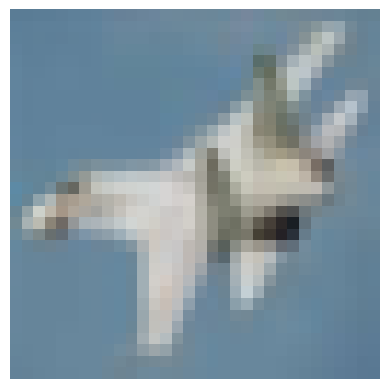

In [13]:
new_image = x_test[10]
plt.imshow(new_image)
plt.axis("off")

In [14]:
img = np.expand_dims(new_image, axis=0)

In [15]:
img.shape

(1, 32, 32, 3)

In [16]:
pred = softmax_model.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [17]:
pred

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

In [18]:
prediction = np.argmax(pred)
cifar_10_classes[prediction]

'Ship'

## Transfer Learning

In [9]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train = X_train / 255.0
X_test = X_test / 255.0

one_hot_encoder = OneHotEncoder(categories='auto')
y_train = one_hot_encoder.fit_transform(y_train).toarray()
y_test = one_hot_encoder.transform(y_test).toarray()

In [20]:
from tensorflow.keras.applications import VGG16

In [21]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

for layer in base_model.layers:
    layer.trainable = False

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 18s 0us/step


In [22]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout

In [23]:
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(10, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

In [24]:
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=1, validation_data=(X_test, y_test))

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 134s 86ms/step - accuracy: 0.4170 - loss: 1.6512 - val_accuracy: 0.5589 - val_loss: 1.2694


(-0.5, 31.5, 31.5, -0.5)

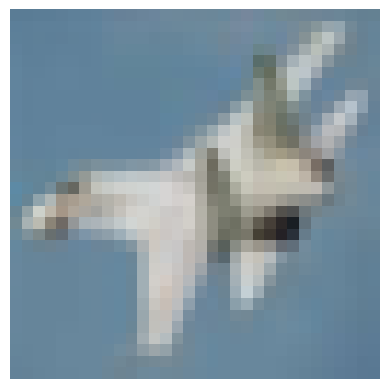

In [11]:
import matplotlib.pyplot as plt

sample_image = X_test[10]
plt.imshow(sample_image)
plt.axis("off")

In [13]:
X_test[10].shape

(32, 32, 3)

In [17]:
img = np.expand_dims(sample_image, axis=0)
img.shape

(1, 32, 32, 3)

In [14]:
pred = model.predict(X_test[10])

NameError: name 'model' is not defined

In [27]:
pred

array([[9.0595210e-01, 1.8742435e-03, 2.3428647e-02, 4.9186498e-03,
        1.4194374e-02, 5.9202025e-03, 1.2079343e-03, 4.1159475e-03,
        3.7657913e-02, 7.3006016e-04]], dtype=float32)

In [28]:
print(cifar_10_classes[np.argmax(pred)])

Airplane


## Realtime Image

In [30]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img

def predict_image(image_path):
    img = load_img(image_path, target_size=(32, 32))
    img_array = img_to_array(img) / 255.0

    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)

    pred = np.argmax(prediction)
    return cifar_10_classes[pred]